**Testing for Time Stationary or Non - Stationary**

**Brief Notes:**
Data is stationary when mean and variance does not changes with time and in statistical test the test statistics are lesser than the crirical values and it's not function of time.
Data is non-stationary when mean and variance changes with time and in statistical test the test statistics are higher than the crirical values.
However, the non-stationary data can be converted to stationary using differencing and transformation method.


Testing Stationary using Augmented Dickey Fuller(ADF) test and Kwiatkowski-Phillips-Schmidt-Shin(KPSS) test

In [0]:
#Importing libraries...
import pandas as pd
import numpy as np
import datetime as dt
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

DataSet here we used is some random prices based on time

In [0]:
#Importing dataset...
data = pd.read_csv("/content/Time series.csv")
data.timestamp = pd.to_datetime(data["Date"])
data.index = data.timestamp
data.drop("Date", axis = 1, inplace= True)
data

,Price
Date,
2011-01-17,120
2011-01-18,121
2011-01-19,122
2011-01-20,123
2011-01-21,126
2011-01-22,129
2011-01-23,132
2011-01-24,135
2011-01-25,138


Plotting the price vs time to check visually if the data has trend or not.
If there is a trend in data, then the mean and variance will change on time to time and if mean and variance is not constant then it's non-stationary

<Figure size 432x288 with 0 Axes>

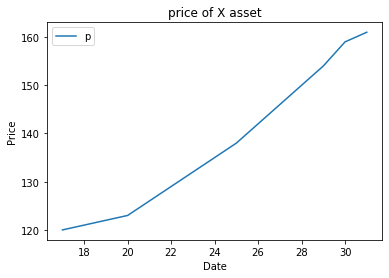

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(data.index.day, data.Price)
plt.title("price of X asset")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend("price")
plt.figure()

Here we can see clearly that price is trending hence it's non-stationary.

Creating functions for statistical testing

In [0]:
#ADF test...
def adf_test(dat):
  print("Test results from ADF: ")
  test_st = adfuller(dat, autolag= "AIC")
  test_st_out = pd.Series(test_st[0:4], index=["Test Statistics", "p-value", "Lags", "Number of obs"])
  for a,b in test_st[4].items():
    test_st_out['critical value {}'.format(a)] = b
  return(test_st_out)

#KPSS test...
def kpss_test(dat):
  print("Test results from kpss: ")
  test_st = kpss(dat, regression = 'c')
  test_st_out = pd.Series(test_st[0:3], index=["Test Statistics", "p-value", "Lags"])
  for a,b in test_st[3].items():
    test_st_out['critical value {}'.format(a)] = b
  return(test_st_out)

In [0]:
adf_test(data.Price)

Test results from ADF: 


Test Statistics        0.225051
p-value                0.973632
Lags                   1.000000
Number of obs         13.000000
critical value 1%     -4.068854
critical value 5%     -3.127149
critical value 10%    -2.701730
dtype: float64

In [0]:
kpss_test(data.Price)

Test results from kpss: 


Test Statistics        0.368132
p-value                0.090891
Lags                   8.000000
critical value 10%     0.347000
critical value 5%      0.463000
critical value 2.5%    0.574000
critical value 1%      0.739000
dtype: float64

The test statistics in both test is higher than the critical value and if test statistics is higher than critical value then it concludes that it's non-stationary

Reference:


1.   Analysis of Financial Time Series by Ruey S. Tsay
2.   https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/



